In [1]:
from txgnn import TxData, TxGNN, TxEval
import requests
import matplotlib.pyplot as plt
import seaborn as sns

TxData_inst = TxData(data_folder_path = '/om/user/tysinger/kg/')

/home/tysinger/.conda/envs/txgnn_env2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Found local copy...
Found local copy...
Found local copy...


In [2]:
TxData_inst.prepare_split(split = 'random', seed = 42, no_kg = False)
TxGNN_model = TxGNN(data = TxData_inst, 
            weight_bias_track = False,
            proj_name = 'MEng',
            exp_name = 'Sweep',
            device = 'cpu'
)

Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
Done!


In [9]:
TxData_inst.G.nodes('molecular_function')

tensor([    0,     1,     2,  ..., 11166, 11167, 11168])

In [12]:
all_disease_ids = torch.where(TxData_inst.G.out_degrees(etype='molfunc_protein') != 0)[0]

In [19]:
all_protein_profiles = []
for idx, prot_idx in enumerate(TxData_inst.G.nodes('gene/protein').tolist()):
    import torch
    prot_idx = 0
    nodes = TxData_inst.G.successors(prot_idx, etype='molfunc_protein')
    num_nodes = len(TxData_inst.G.nodes('molecular_function'))
    node_profile = torch.zeros((num_nodes,))
    node_profile[nodes] = 1.
    all_protein_profiles.append(node_profile.tolist())
    if idx%1000==0:
        print(idx)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000


In [ ]:
with open(os.path.join('/om/user/tysinger/embeddings', 'protein_function_labels.pkl'), 'wb') as f:
    pickle.dump(all_protein_profiles, f)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
kg_df = pd.read_csv('../kg/kg.csv')
nodes_df = pd.read_csv('../kg/node.csv', sep='\t')
edges_df = pd.read_csv('../kg/edges.csv')


In [6]:
edges_df['relation'].unique()

array(['protein_protein', 'drug_protein', 'contraindication',
       'indication', 'off-label use', 'drug_drug', 'phenotype_protein',
       'phenotype_phenotype', 'disease_phenotype_negative',
       'disease_phenotype_positive', 'disease_protein', 'disease_disease',
       'drug_effect', 'bioprocess_bioprocess', 'molfunc_molfunc',
       'cellcomp_cellcomp', 'molfunc_protein', 'cellcomp_protein',
       'bioprocess_protein', 'exposure_protein', 'exposure_disease',
       'exposure_exposure', 'exposure_bioprocess', 'exposure_molfunc',
       'exposure_cellcomp', 'pathway_pathway', 'pathway_protein',
       'anatomy_anatomy', 'anatomy_protein_present',
       'anatomy_protein_absent'], dtype=object)

In [ ]:
from Bio import SeqIO

def count_sequences(file_name):
    count = 0
    with open(file_name, "r") as file:
        for record in SeqIO.parse(file, "fasta"):
            count += 1
    return count

# Replace 'gene_sequences_1.fasta' with the path to your FASTA file
number_of_sequences = count_sequences('embeddings/gene_sequences_3.fasta')
print(f"Number of sequences: {number_of_sequences}")


## Node Exploration

In [5]:
df_test = pd.read_csv('../kg/random_42/test.csv')
df_test.head()

/tmp/ipykernel_9929/2395209735.py:1: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('../kg/random_42/test.csv')


,x_type,x_id,relation,y_type,y_id,x_idx,y_idx
0,gene/protein,207.0,protein_protein,gene/protein,1017.0,9137.0,2963.0
1,gene/protein,672.0,protein_protein,gene/protein,23064.0,22160.0,9792.0
2,gene/protein,5957.0,protein_protein,gene/protein,7048.0,20390.0,22693.0
3,gene/protein,351.0,protein_protein,gene/protein,11269.0,14047.0,5899.0
4,gene/protein,5027.0,protein_protein,gene/protein,388677.0,16925.0,14770.0


In [5]:
print("Node Data:")
nodes_df.head()

Node Data:


,node_index,node_id,node_type,node_name,node_source
0,0,9796,gene/protein,PHYHIP,NCBI
1,1,7918,gene/protein,GPANK1,NCBI
2,2,8233,gene/protein,ZRSR2,NCBI
3,3,4899,gene/protein,NRF1,NCBI
4,4,5297,gene/protein,PI4KA,NCBI


In [12]:
max(filtered_df.x_idx)

11142.0

In [14]:
filtered_df = df_test[df_test.x_type == 'molecular_function']
random_node_ids = list(filtered_df.sample(n=200)['x_idx'])
random_node_ids

[3647.0,
 6042.0,
 9534.0,
 9534.0,
 9150.0,
 6470.0,
 5378.0,
 5422.0,
 10267.0,
 10267.0,
 3898.0,
 8982.0,
 9534.0,
 8843.0,
 8814.0,
 8001.0,
 5681.0,
 3534.0,
 3986.0,
 6460.0,
 9534.0,
 11029.0,
 8002.0,
 1433.0,
 11069.0,
 2296.0,
 5881.0,
 9534.0,
 6677.0,
 11024.0,
 9043.0,
 8528.0,
 11024.0,
 3001.0,
 2015.0,
 3546.0,
 10667.0,
 1217.0,
 8034.0,
 10386.0,
 11024.0,
 9534.0,
 2318.0,
 8001.0,
 11066.0,
 9542.0,
 3903.0,
 3484.0,
 10195.0,
 9534.0,
 2349.0,
 8039.0,
 10732.0,
 1670.0,
 6042.0,
 9842.0,
 3090.0,
 9526.0,
 2332.0,
 5881.0,
 10163.0,
 5955.0,
 8486.0,
 2130.0,
 4970.0,
 10408.0,
 6460.0,
 9565.0,
 9615.0,
 6807.0,
 2439.0,
 3647.0,
 3363.0,
 8025.0,
 2239.0,
 2369.0,
 3406.0,
 3670.0,
 6228.0,
 5392.0,
 1422.0,
 9542.0,
 9523.0,
 9534.0,
 9532.0,
 6792.0,
 11024.0,
 8001.0,
 5400.0,
 2333.0,
 5400.0,
 8051.0,
 442.0,
 6076.0,
 6842.0,
 5400.0,
 9534.0,
 10224.0,
 1588.0,
 10404.0,
 9534.0,
 1772.0,
 3929.0,
 6491.0,
 10267.0,
 5881.0,
 9057.0,
 10146.0,
 9534.0,
 

In [ ]:
handle = Entrez.esearch(db="protein", retmax=10, term='GPANK1')
record = Entrez.read(handle)
handle.close()
record["IdList"]

In [ ]:
handle = Entrez.efetch(db="protein", id=record["IdList"][0], rettype="fasta", retmode="text")
gene_data = handle.read()
handle.close()
gene_data

In [ ]:
handle = Entrez.efetch(db="protein", id=record["IdList"][1], rettype="fasta", retmode="text")
gene_data = handle.read()
handle.close()
gene_data

In [ ]:
from Bio import Entrez
import time

# Always tell NCBI who you are (email)
Entrez.email = "tysinger@mit.edu"

def fetch_sequences(id_list, output_file, gene_id_dict):
    with open(output_file, 'w') as outfile:
        for i, gene_id in enumerate(id_list):
            # Fetch the sequence
            if i%10 == 0:
                print(i)
            handle = Entrez.esearch(db="protein", retmax=10, term=gene_id, idtype='acc')
            record = Entrez.read(handle)
            handle.close()
            id_list = record["IdList"]
            gene_id_dict[id_list[0]] = gene_id

            handle = Entrez.efetch(db="protein", id=id_list[0], rettype="fasta", retmode="text")
            gene_data = handle.read()
            handle.close()
            
            # Write the sequence to a file
            outfile.write(gene_data)
            
            # NCBI recommends not to send more than 3 requests per second to avoid overload
            # on their servers, so we wait for a third of a second before the next request
            time.sleep(1)
    return gene_id_dict

# Example usage
gene_ids = list(nodes_df[nodes_df.node_type == 'gene/protein']['node_name'])[:200]  
output_filename = "gene_sequences.fasta"  
gene_id_dict = {}
gene_id_dict = fetch_sequences(gene_ids, output_filename, gene_id_dict)


In [ ]:
import pathlib
import torch

from esm import FastaBatchedDataset, pretrained

In [ ]:
def extract_embeddings(model_name, fasta_file, output_dir, gene_dict, tokens_per_batch=4096, seq_length=1022,repr_layers=[33]):
    
    model, alphabet = pretrained.load_model_and_alphabet(model_name)
    model.eval()

    if torch.cuda.is_available():
        model = model.cuda()
        
    dataset = FastaBatchedDataset.from_file(fasta_file)
    batches = dataset.get_batch_indices(tokens_per_batch, extra_toks_per_seq=1)

    data_loader = torch.utils.data.DataLoader(
        dataset, 
        collate_fn=alphabet.get_batch_converter(seq_length), 
        batch_sampler=batches
    )

    output_dir.mkdir(parents=True, exist_ok=True)
    
    with torch.no_grad():
        for batch_idx, (labels, strs, toks) in enumerate(data_loader):

            print(f'Processing batch {batch_idx + 1} of {len(batches)}')

            if torch.cuda.is_available():
                toks = toks.to(device="cuda", non_blocking=True)

            out = model(toks, repr_layers=repr_layers, return_contacts=False)

            logits = out["logits"].to(device="cpu")
            representations = {layer: t.to(device="cpu") for layer, t in out["representations"].items()}
            
            for i, label in enumerate(labels):
                entry_id = label.split()[0]
                try:
                    gene_id = gene_dict[entry_id]
                except:
                    entry_id = entry_id.split('|')[1]
                    gene_id = gene_dict[entry_id]
                
                filename = output_dir / f"{gene_id}.pt"
                truncate_len = min(seq_length, len(strs[i]))

                result = {"gene_id": gene_id, 
                          "entry_id": entry_id}
                result["mean_representations"] = {
                        layer: t[i, 1 : truncate_len + 1].mean(0).clone()
                        for layer, t in representations.items()
                    }

                torch.save(result, filename)

In [ ]:
gene_id_dict

In [ ]:
model_name = 'esm2_t33_650M_UR50D'
fasta_file = pathlib.Path('./gene_sequences.fasta')
output_dir = pathlib.Path('train_embeddings')

extract_embeddings(model_name, fasta_file, output_dir, gene_id_dict)


In [ ]:
import torch

embedding = torch.load('train_embeddings/XP_060544080.1.pt')
embedding = embedding['mean_representations'][33].numpy()

In [ ]:
embedding.shape

In [ ]:
len(set(nodes_df[nodes_df.node_type == 'gene/protein']['node_name']))

In [ ]:
# getting unique node types
unique_node_types = nodes_df['node_type'].value_counts()
unique_node_types_df = unique_node_types.to_frame().reset_index()
unique_node_types_df.columns = ['node_type', 'count']
unique_node_types_df


In [ ]:
# get protein nodes
protein_nodes = nodes_df[nodes_df['node_type'] == 'gene/protein']
protein_nodes.set_index('node_index', inplace=True)
protein_nodes

In [ ]:
# getting unique sources
unique_sources = protein_nodes['node_source'].value_counts()
unique_sources_df = unique_sources.to_frame().reset_index()
unique_sources_df.columns = ['node_source', 'count']
unique_sources_df

## Edge Exploration

In [ ]:
print("Edges Data:")
edges_df.head()

In [ ]:
print('Unique relations: ')
unique_relations = edges_df['relation'].value_counts()
unique_relations_df = unique_relations.to_frame().reset_index()
unique_relations_df.columns = ['relation', 'count']
unique_relations_df

In [ ]:
relation_sources = unique_kg_df_proteins[['relation', 'y_source']].drop_duplicates(subset=['relation'], keep='first').reset_index(drop=True).rename(columns={'y_source': 'data_source'})
relation_sources

In [ ]:
# unique relations containing protein
protein_relations = unique_relations_df[unique_relations_df.relation.str.contains('protein')].reset_index(drop=True)
protein_relations = merged_df = pd.merge(protein_relations, relation_sources, on='relation', how='left')
protein_relations['relation'] = ['Anatomy Present', 'Protein', 'Biological Process', 'Cellular Component', 'Disease', 'Molecular Function',
                                 'Pathway', 'Drug', 'Anatomy Absent', 'Phenotype', 'Exposure']

plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
sns.barplot(x='count', y='relation', data=protein_relations, hue='data_source',dodge=False)

# Set plot labels and title
plt.xlabel('Count')
plt.ylabel('')
plt.title('Relations containing Protein')
plt.legend(title='Data Source')

# Show the plot
plt.show()

In [ ]:
protein_relations

In [ ]:
print('Unique display relations: ')
unique_display_relations = edges_df['display_relation'].value_counts()
unique_display_relations_df = unique_display_relations.to_frame().reset_index()
unique_display_relations_df.columns = ['display relation', 'count']
unique_display_relations_df

In [ ]:
unique_pairs_counts = edges_df.groupby(['relation', 'display_relation']).size().reset_index(name='count')
unique_pair_counts_df = unique_pairs_counts
unique_pair_counts_df.columns = ['relation','display relation', 'count']
unique_pair_counts_df[unique_pair_counts_df.relation.str.contains('protein')].reset_index(drop=True)

## Whole Knowledge Graph Exploration

In [ ]:
print("Knowledge Graph Data:")
kg_df.head()

In [ ]:
unique_kg_df = kg_df.groupby(['relation', 'display_relation','x_type', 'y_type', 'y_source']).size().reset_index(name='count')
unique_kg_df_proteins = unique_kg_df[(unique_kg_df['x_type'] == 'gene/protein') & (unique_kg_df['relation'].str.contains('protein'))].reset_index(drop=True)
unique_kg_df_proteins

In [ ]:
unique_molecular_function_kg = kg_df[(kg_df['relation'] == 'molfunc_protein')&(kg_df['x_type'] == 'gene/protein')][['y_name']].drop_duplicates().reset_index(drop=True)
unique_molecular_function_kg

In [ ]:
protein_molecular_func = kg_df[(kg_df['relation'] == 'molfunc_protein')&(kg_df['x_type'] == 'gene/protein')].groupby('x_name').size().reset_index(name='number of molfunc relations')
protein_pathway = kg_df[(kg_df['relation'] == 'pathway_protein')&(kg_df['x_type'] == 'gene/protein')].groupby('x_name').size().reset_index(name='number of pathway relations')
protein_disease = kg_df[(kg_df['relation'] == 'disease_protein')&(kg_df['x_type'] == 'gene/protein')].groupby('x_name').size().reset_index(name='number of disease relations')


In [ ]:
merged_df = pd.merge(protein_molecular_func, protein_pathway, on='x_name', how='outer')
merged_df = pd.merge(merged_df, protein_disease, on='x_name', how='outer')
merged_df.fillna(0, inplace=True)
merged_df


In [ ]:
grouped_molfunc_df = merged_df.groupby('number of molfunc relations').size().reset_index(name='molfunc')
grouped_molfunc_df = grouped_molfunc_df.rename(columns={'number of molfunc relations': 'number of relations'})

grouped_pathway_df = merged_df.groupby('number of pathway relations').size().reset_index(name='pathway')
grouped_pathway_df = grouped_pathway_df.rename(columns={'number of pathway relations': 'number of relations'})

grouped_disease_df = merged_df.groupby('number of disease relations').size().reset_index(name='disease')
grouped_disease_df = grouped_disease_df.rename(columns={'number of disease relations': 'number of relations'})

In [ ]:
merged_grouped_df = pd.merge(grouped_molfunc_df, grouped_pathway_df, on='number of relations', how='outer')
merged_grouped_df = pd.merge(merged_grouped_df, grouped_disease_df, on='number of relations', how='outer')
merged_grouped_df.fillna(0, inplace=True)
merged_grouped_df

In [ ]:
# Group the data by the number of molfunc relations and count the number of proteins
grouped_df = protein_molecular_func.groupby('number of molfunc relations').size().reset_index(name='number of proteins')

# Create the bar chart
plt.bar(grouped_df['number of molfunc relations'], grouped_df['number of proteins'])

# Customize the chart labels and title
plt.xlabel('Number of Molfunc Relations')
plt.ylabel('Number of Proteins')
plt.title('Protein Molecular Function')

# Display the chart
plt.show()


In [ ]:
# Group the data by the number of molfunc relations and count the number of proteins
grouped_df = protein_pathway.groupby('number of pathway relations').size().reset_index(name='number of proteins')
grouped_df = grouped_df[grouped_df['number of pathway relations']<=60]

# Create the bar chart
plt.bar(grouped_df['number of pathway relations'], grouped_df['number of proteins'])
#plt.yscale('log')

# Customize the chart labels and title
plt.xlabel('Number of Pathway Relations')
plt.ylabel('Number of Proteins')
plt.title('Protein Pathway')

# Display the chart
plt.show()


In [ ]:
# Group the data by the number of molfunc relations and count the number of proteins
grouped_df = protein_disease.groupby('number of disease relations').size().reset_index(name='number of proteins')
grouped_df = grouped_df[grouped_df['number of disease relations']<=60]

# Create the bar chart
plt.bar(grouped_df['number of disease relations'], grouped_df['number of proteins'])
#plt.yscale('log')

# Customize the chart labels and title
plt.xlabel('Number of Disease Relations')
plt.ylabel('Number of Proteins')
plt.title('Protein Disease')

# Display the chart
plt.show()

## Drug Disease Exploration

In [ ]:
unique_kg_df = kg_df.groupby(['relation', 'display_relation','x_type', 'y_type']).size().reset_index(name='count')
unique_kg_df_drug_disease = unique_kg_df[((unique_kg_df['relation']=='contraindication')|(unique_kg_df['relation']=='indication'))&(unique_kg_df['x_type']=='drug')].reset_index(drop=True)
unique_kg_df_drug_disease

In [ ]:
drug_disease_count = kg_df[((kg_df['relation']=='contraindication')|(kg_df['relation']=='indication'))&(kg_df['x_type'] == 'disease')].groupby('x_name').size().reset_index(name='number of relations')
grouped_drug_disease_count = drug_disease_count.groupby('number of relations').size().reset_index(name='number of diseases')

In [ ]:
diseases_nonzero_drugdisease = grouped_drug_disease_count['number of diseases'].sum()
total_diseases = nodes_df[nodes_df['node_type'] == 'disease'].groupby('node_name').size().reset_index(name='number of diseases').sum()
diseases_nonzero_drugdisease

In [ ]:
total_diseases

In [ ]:
# Create the bar chart
grouped_drug_disease_count = grouped_drug_disease_count[grouped_drug_disease_count['number of relations']<=100]
plt.bar(grouped_drug_disease_count['number of relations'], grouped_drug_disease_count['number of diseases'])
#plt.yscale('log')

# Customize the chart labels and title
plt.xlabel('Number of Drug-Disease Relations')
plt.ylabel('Number of Diseases')
plt.title('Drug Disease')

# Display the chart
plt.show()

In [ ]:
grouped_drug_disease_count

In [ ]:
unique_kg_df

# Loading embeddings for proteins

In [1]:
from txgnn.model import HeteroRGCN
from IPython import get_ipython
from importlib import reload

# Import the desired libraries
import txgnn

# Reload the libraries
reload(txgnn)

from txgnn import TxData, TxGNN, TxEval
import torch.nn as nn
import torch
import os
import pandas as pd
from tqdm.auto import tqdm

/home/tysinger/.conda/envs/txgnn_env2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
TxData_inst = TxData(data_folder_path = '/om/user/tysinger/kg/')
TxData_inst.prepare_split(split = 'random', seed = 42, no_kg = False)

Found local copy...
Found local copy...
Found local copy...
Found saved processed KG... Loading...
Splits detected... Loading splits....
Creating DGL graph....
{'anatomy': 14032.0, 'biological_process': 28641.0, 'cellular_component': 4175.0, 'disease': 17079.0, 'drug': 7956.0, 'effect/phenotype': 15310.0, 'exposure': 817.0, 'gene/protein': 27609.0, 'molecular_function': 11168.0, 'pathway': 2515.0}
Done!


In [5]:
TxGNN_model = txgnn.TxGNN(data = TxData_inst, 
              weight_bias_track = False,
              proj_name = 'TxGNN',
              exp_name = 'TxGNN',
              device = 'cpu'
              )



TxGNN_model.model_initialize(n_hid = 1280, 
                      n_inp = 1280, 
                      n_out = 1280, 
                      proto = False, #made this False
                      proto_num = 3,
                      attention = False,
                      sim_measure = 'all_nodes_profile',
                      bert_measure = 'disease_name',
                      agg_measure = 'rarity',
                      num_walks = 200,
                      walk_mode = 'bit',
                      path_length = 2,
                      esm = False)

In [4]:
def initialize_node_embedding(g, n_inp, df, df_nodes, esm=False):
    # initialize embedding xavier uniform
    for ntype in g.ntypes:
        if not esm or ntype != 'gene/protein':
            emb = nn.Parameter(torch.Tensor(g.number_of_nodes(ntype), n_inp), requires_grad = False)
            nn.init.xavier_uniform_(emb)
            g.nodes[ntype].data['inp'] = emb
        elif ntype == 'gene/protein':
            idx2id = dict(zip(df[df.x_type == 'gene/protein']['x_idx'],df[df.x_type == 'gene/protein']['x_id']))
            idx2id.update(zip(df[df.y_type == 'gene/protein']['y_idx'],df[df.y_type == 'gene/protein']['y_id']))
            id2name = dict(zip(df_nodes[df_nodes.node_type == 'gene/protein'].node_id,df_nodes[df_nodes.node_type == 'gene/protein'].node_name))
            prot_embs = []
            #get mapping from idx to node name
            for i in tqdm(range(g.number_of_nodes(ntype))):
                try:
                    id = idx2id[i]
                    name = id2name[str(int(float(id)))]
                    emb_path = os.path.join('/om/user/tysinger/TxGNN/embeddings/esm_embeddings/', name+'.pt')
                except Exception as e: 
                    try:
                        id = idx2id[i]
                        name = id2name[id]
                        emb_path = os.path.join('/om/user/tysinger/TxGNN/embeddings/esm_embeddings/', name+'.pt')
                    except:
                        emb_path = 'None'


                if os.path.exists(emb_path):
                    esm_emb = torch.load(emb_path)
                    prot_embs.append(list(esm_emb['mean_representations'].values())[0])
                else:
                    # Create xavier embedding for those without esm embedding
                    xavier_emb = nn.init.xavier_uniform_(torch.Tensor(1, n_inp)).squeeze() #.tolist()[0]
                    prot_embs.append(xavier_emb)
            
            # convert list to tensor
            emb = nn.Parameter(torch.stack(prot_embs), requires_grad=False)
            g.nodes[ntype].data['inp'] = emb
    return g

In [ ]:
len(nodes[nodes.node_type == 'gene/protein'])

In [5]:
initialize_node_embedding(TxData_inst.G, 1280, TxData_inst.df, nodes, esm=True)

100%|██████████| 27610/27610 [00:38<00:00, 721.48it/s]


ESM embeddings found:  20873
ESM embeddings not found:  6737
Name not found:  0


Graph(num_nodes={'anatomy': 14033, 'biological_process': 28642, 'cellular_component': 4176, 'disease': 17080, 'drug': 7957, 'effect/phenotype': 15311, 'exposure': 818, 'gene/protein': 27610, 'molecular_function': 11169, 'pathway': 2516},
      num_edges={('anatomy', 'anatomy_anatomy', 'anatomy'): 23328, ('anatomy', 'rev_anatomy_protein_absent', 'gene/protein'): 16531, ('anatomy', 'rev_anatomy_protein_present', 'gene/protein'): 1262006, ('biological_process', 'bioprocess_bioprocess', 'biological_process'): 87924, ('biological_process', 'rev_bioprocess_protein', 'gene/protein'): 120369, ('biological_process', 'rev_exposure_bioprocess', 'exposure'): 1351, ('cellular_component', 'cellcomp_cellcomp', 'cellular_component'): 8056, ('cellular_component', 'rev_cellcomp_protein', 'gene/protein'): 69328, ('cellular_component', 'rev_exposure_cellcomp', 'exposure'): 9, ('disease', 'disease_disease', 'disease'): 53522, ('disease', 'disease_phenotype_negative', 'effect/phenotype'): 991, ('disease', '

In [3]:
kg_path = os.path.join(TxData_inst.data_folder, TxData_inst.split + '_kg', 'kg.csv')
kg_path = os.path.join(TxData_inst.data_folder, 'kg.csv')
nodes = pd.read_csv(os.path.join(TxData_inst.data_folder, 'nodes.csv'))
#df = pd.read_csv(kg_path)
#split_data_path = os.path.join(TxData_inst.data_folder, TxData_inst.split + '_' + str(42))
#df_train = pd.read_csv(os.path.join(split_data_path, 'train.csv'))

In [6]:
#id2name = dict(zip(nodes[nodes.node_type == 'gene/protein'].node_id,nodes[nodes.node_type == 'gene/protein'].node_name))
idx2id = dict(zip(TxData_inst.df_train[TxData_inst.df_train.x_type == 'gene/protein']['x_idx'], TxData_inst.df_train[TxData_inst.df_train.x_type == 'gene/protein']['x_id']))
idx2id.update(dict(zip(TxData_inst.df_train[TxData_inst.df_train.x_type == 'gene/protein']['y_idx'], TxData_inst.df_train[TxData_inst.df_train.x_type == 'gene/protein']['y_id'])))

In [ ]:
id = idx2id[8]
id

In [ ]:
id_keys = list(int(k) for k in id2name.keys())
id_keys.sort()
print(id in id_keys)

In [ ]:
for i in range(100):
    id = idx2id[i]
    try:
        name = id2name[str(int(id))]
        print(name)
        emb_path = os.path.join('/Users/emmatysinger/Develop/meng/TxGNN/embeddings/embeddings1/', name+'.pt')
        print(emb_path)
    except:
        print(id)

In [ ]:
nodes[nodes.node_type == 'gene/protein']

In [4]:
def create_dgl_graph(df_train, df):
    unique_graph = df_train[['x_type', 'relation', 'y_type']].drop_duplicates()
    DGL_input = {}
    for i in unique_graph.values:
        o = df_train[df_train.relation == i[1]][['x_idx', 'y_idx']].values.T
        DGL_input[tuple(i)] = (o[0].astype(int), o[1].astype(int))

    temp = dict(df.groupby('x_type')['x_idx'].max())
    temp2 = dict(df.groupby('y_type')['y_idx'].max())
    temp['effect/phenotype'] = 0.0

    
    output = {}

    for d in (temp, temp2):
        for k, v in d.items():
            output.setdefault(k, float('-inf'))
            output[k] = max(output[k], v)
    
    print(output)

    g = dgl.heterograph(DGL_input, num_nodes_dict={i: int(output[i])+1 for i in output.keys()})
    
    # get node, edge dictionary mapping relation sent to index
    node_dict = {}
    edge_dict = {}
    for ntype in g.ntypes:
        node_dict[ntype] = len(node_dict)
    for etype in g.etypes:
        edge_dict[etype] = len(edge_dict)
        g.edges[etype].data['id'] = torch.ones(g.number_of_edges(etype), dtype=torch.long) * edge_dict[etype] 

    return g

In [5]:
create_dgl_graph(df_train, pd.read_csv(kg_path))

# Ploting training curves


In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def pretrain_plot(data_list):
    df = pd.read_csv(data_list[0])
    metrics = ['Loss', 'AUROC', 'AUPRC']

    df['Epoch-Step'] = df.apply(lambda row: f"{int(row.Epoch)}-{int(row.Step)}", axis=1)
    sns.set_theme(context='notebook', style='white')
    sns.set_palette('colorblind')

    for metric in metrics:
        plt.figure(figsize=(12, 6))
        if metric == 'Loss':
            sns.lineplot(x=df['Epoch-Step'], y=df[metric], label=metric)
        else:
            sns.lineplot(x=df['Epoch-Step'], y=df['Micro '+metric], label='Micro '+metric)
            sns.lineplot(x=df['Epoch-Step'], y=df['Macro '+metric], label='Macro '+metric)
        plt.xlabel('Epoch-Step')
        plt.ylabel(metric)
        plt.title(f'{metric} during Pretraining')
        plt.xticks(rotation=45)  
        plt.legend()
        plt.tight_layout()  
        plt.show()

def finetune_plot(data_list):
    df = pd.read_csv(data_list[0])

    metric_pairs = [
        ('Train Micro AUROC', 'Validation Micro AUROC'),
        ('Train Micro AUPRC', 'Validation Micro AUPRC'),
        ('Train Macro AUROC', 'Validation Macro AUROC'),
        ('Train Macro AUPRC', 'Validation Macro AUPRC'),
        ('Loss', 'Validation Loss')
    ]
    sns.set_theme(context='notebook', style='white')
    sns.set_palette('colorblind')  

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.flatten() 

    for idx, (train_metric, val_metric) in enumerate(metric_pairs[:-1]):
        ax = axes[idx]

        sns.lineplot(ax=ax, x=df['Epoch'], y=df[train_metric], label=f'{train_metric[:5]}')
        df[val_metric] = df[val_metric].interpolate()
        sns.lineplot(ax=ax, x=df['Epoch'], y=df[val_metric], label=f'{val_metric[:10]}')
        
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Metric Value')
        ax.set_title(f'{train_metric[6:]}')
        ax.legend()
        ax.set_ylim([0, 1])

    plt.tight_layout()
    plt.show()
    plt.clf()

    train_metric = 'Loss'
    val_metric  = 'Validation Loss'
    plt.figure(figsize=(12, 6))

    sns.lineplot(x=df['Epoch'], y=df[train_metric], label='Training '+train_metric, linestyle='-')

    df[val_metric] = df[val_metric].interpolate()
    sns.lineplot(x=df['Epoch'], y=df[val_metric], label=val_metric, linestyle='-')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{train_metric} and {val_metric} during Finetuning')
    plt.legend()
    plt.show()

In [ ]:
data_list = ['training_logs/pretraining_esm.csv']
pretrain_plot(data_list)

In [ ]:
data_list = ['training_logs/finetuning_esm1.csv']
finetune_plot(data_list)

In [2]:
import pandas as pd
import pickle

file_path = '../kg/random_finetune_eval_small.pkl'

with open(file_path, 'rb') as file:
    data = pickle.load(file)

In [3]:
view1 = data[['ID', 'Name', 'AUROC', 'AUPRC', 'Accuracy',
       'Sensitivity', 'Specificity', 'F1', 'PPV', 'NPV', 'FPR', 'FNR', 'FDR',
       '# of Pos']]
view2 = data[['ID', 'Name', 'Ranked List', 'AUROC', 'AUPRC', 'Accuracy',
       'Recall@5%', 'Recall_Random@5%',
       'AP@5%', 'Hits@5%', 'Missed@5%']]
view3 = data[['ID', 'Name', 'Ranked List', 'AUROC', 'AUPRC', 'Accuracy',
       'Recall@10%', 'Recall_Random@10%',
       'AP@10%', 'Hits@10%', 'Missed@10%']]
view4 = data[['ID', 'Name', 'Ranked List', 'AUROC', 'AUPRC', 'Accuracy',
              'Recall@50', 'Recall_Random@50',
       'AP@50', 'Hits@50', 'Missed@50']]
view5 = data[['ID', 'Name', 'Ranked List', 'AUROC', 'AUPRC', 'Accuracy',
              'Recall@100', 'Recall_Random@100',
       'AP@100', 'Hits@100', 'Missed@100']]

In [33]:
view1[view1['# of Pos']>0]

,ID,Name,AUROC,AUPRC,Accuracy,Sensitivity,Specificity,F1,PPV,NPV,FPR,FNR,FDR,# of Pos
44877.0,44877.0,protein-containing complex binding,0.782373,0.004724,0.844521,0.437500,0.844887,0.005032,0.002531,0.999401,0.155113,0.562500,0.997469,16
5102.0,5102.0,signaling receptor binding,0.864722,0.008400,0.896840,0.541667,0.897319,0.013948,0.007065,0.999312,0.102681,0.458333,0.992935,24
31369.0,31369.0,translation initiation factor binding,0.979255,0.004517,0.940365,1.000000,0.940359,0.003687,0.001847,1.000000,0.059641,0.000000,0.998153,2
4623.0,4623.0,phospholipase A2 activity,0.997655,0.033224,0.980632,1.000000,0.980630,0.011268,0.005666,1.000000,0.019370,0.000000,0.994334,2
5515.0,5515.0,protein binding,0.788319,0.291950,0.894404,0.194127,0.969543,0.262693,0.406143,0.918117,0.030457,0.805873,0.593857,613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682.0,3682.0,chromatin binding,0.939910,0.017995,0.914567,0.750000,0.914753,0.019405,0.009830,0.999692,0.085247,0.250000,0.990170,20
31625.0,31625.0,ubiquitin protein ligase binding,0.867268,0.017585,0.907228,0.700000,0.907344,0.008378,0.004214,0.999815,0.092656,0.300000,0.995786,10
50840.0,50840.0,extracellular matrix binding,0.986037,0.003937,0.943985,1.000000,0.943981,0.001967,0.000984,1.000000,0.056019,0.000000,0.999016,1
16779.0,16779.0,nucleotidyltransferase activity,0.979925,0.002740,0.958860,1.000000,0.958857,0.002674,0.001339,1.000000,0.041143,0.000000,0.998661,1


In [13]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix
preds = list(data['Prediction'])
labels = list(data['Labels'])


acc, sens, spec, f1 = [], [], [], []
ppv, npv, fpr, fnr, fdr = [], [], [], [], []

for i in range(len(preds)):
    fixed_keys = [key for key,val in labels[i].items() if val != -1]
    pred_array = np.array([preds[i][j] for j in fixed_keys])
    lab_array = np.array([labels[i][j] for j in fixed_keys])

    y_pred_s = [1 if j >= 0 else 0 for j in pred_array]
    y = lab_array
    cm1 = confusion_matrix(y, y_pred_s)
    if len(cm1) == 1:
        cm1 = np.array([[cm1[0,0], 0], [0, 0]])
    total1=sum(sum(cm1))
    accuracy1=(cm1[0,0]+cm1[1,1])/total1
    acc.append(accuracy1)

    sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    sens.append(sensitivity1)

    specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    spec.append(specificity1)

    f1.append(f1_score(y, y_pred_s))

    TN = cm1[0][0]
    FN = cm1[1][0]
    TP = cm1[1][1]
    FP = cm1[0][1]

    # Precision or positive predictive value
    ppv.append(TP/(TP+FP))
    # Negative predictive value
    npv.append( TN/(TN+FN))
    # Fall out or false positive rate
    fpr.append(FP/(FP+TN))
    # False negative rate
    fnr.append(FN/(TP+FN))
    # False discovery rate
    fdr.append(FP/(TP+FP))

In [14]:
new_data = {'ID':data['ID'], 'Name':data['Name'], 'Accuracy':acc,
            'Sensitivity':sens, 'Specificity':spec, 'F1':f1,
            'PPV':ppv, 'NPV':npv, 'FPR':fpr, 'FNR':fnr, 'FDR':fdr}

new_data_df = pd.DataFrame(new_data)

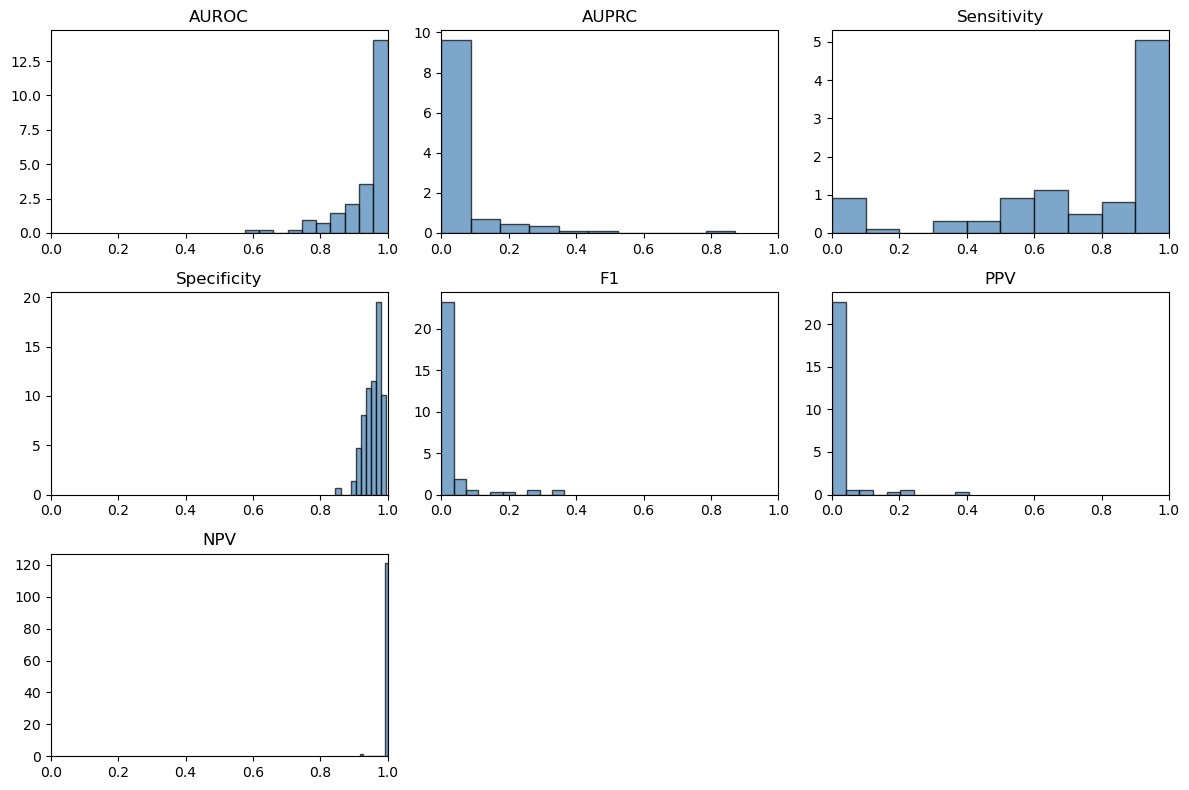

In [4]:
hist_view = view1[view1['# of Pos']>0][['AUROC','AUPRC','Sensitivity','Specificity','F1', 'PPV', 'NPV']]
ax = hist_view.hist(color='steelblue', edgecolor='black',
             grid=False, figsize=(12,8), 
             sharex=False, sharey=False, alpha=0.7, density=True)
for axis in ax.flatten():
    axis.set_xlim([0, 1])

plt.tight_layout()
plt.show()

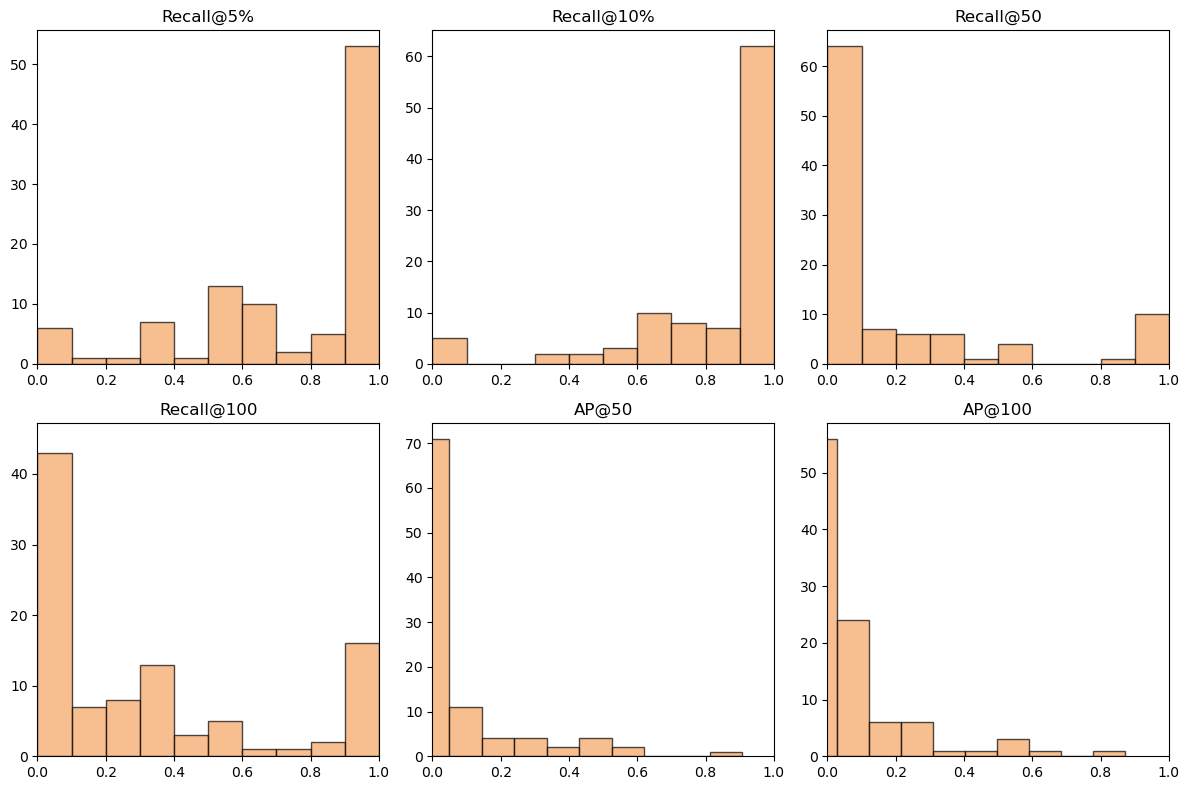

In [7]:
hist_view2 = pd.DataFrame({key:data[key] for key in ['Recall@5%', 'Recall@10%', 'Recall@50', 'Recall@100','AP@50', 'AP@100']})
ax = hist_view2.hist(color='sandybrown', edgecolor='black',
            grid=False, figsize=(12,8), 
            sharex=False, sharey=False, alpha=0.7, layout=(2,3), bins=20)
for axis in ax.flatten():
    axis.set_xlim([0, 1])

plt.tight_layout()
plt.show()

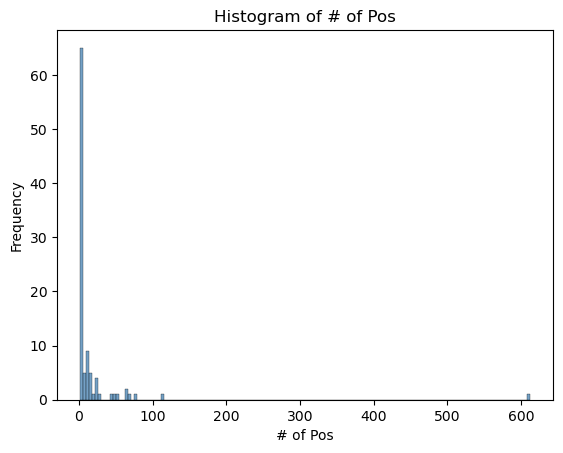

In [32]:
filtered_series = view1[view1['# of Pos'] > 0]['# of Pos']

# Create the histogram using Seaborn
sns.histplot(filtered_series, kde=False, color="steelblue")

# Optionally, you can set titles, labels, etc.
plt.title('Histogram of # of Pos')
plt.xlabel('# of Pos')
plt.ylabel('Frequency')

# Display the plot
plt.show()

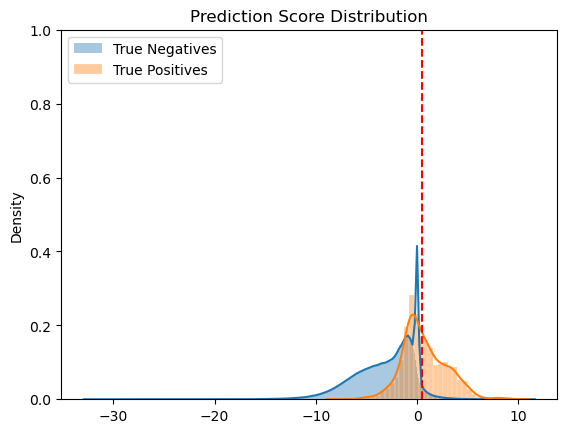

In [11]:
import numpy as np
preds_ = np.concatenate([np.array(list(j.values())) for i, j in data['Prediction'].items()]).reshape(-1,)
labels_ = np.concatenate([np.array(list(j.values())) for i, j in data['Labels'].items()]).reshape(-1,)

preds_pos = preds_[np.where(labels_ == 1)]
preds_neg = preds_[np.where(labels_ == 0)]

sns.histplot(
        preds_neg, kde=True,
        stat="density", kde_kws=dict(cut=3),
        alpha=.4, edgecolor=(1, 1, 1, .4),
        label = 'True Negatives'
    )
plt.title("Prediction Score Distribution")
sns.histplot(
        preds_pos, kde=True,
        stat="density", kde_kws=dict(cut=3),
        alpha=.4, edgecolor=(1, 1, 1, .4),
        label = 'True Positives'
    )
plt.legend()
plt.axvline(0.5, color='red', linestyle='--')
plt.ylim(0, 1)
plt.show()

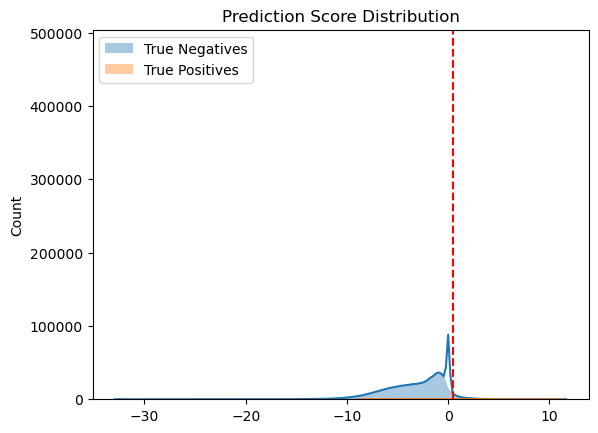

In [12]:
import numpy as np
preds_ = np.concatenate([np.array(list(j.values())) for i, j in data['Prediction'].items()]).reshape(-1,)
labels_ = np.concatenate([np.array(list(j.values())) for i, j in data['Labels'].items()]).reshape(-1,)

preds_pos = preds_[np.where(labels_ == 1)]
preds_neg = preds_[np.where(labels_ == 0)]

sns.histplot(
        preds_neg, kde=True,
        kde_kws=dict(cut=3),
        alpha=.4, edgecolor=(1, 1, 1, .4),
        label = 'True Negatives'
    )
plt.title("Prediction Score Distribution")
sns.histplot(
        preds_pos, kde=True,
        kde_kws=dict(cut=3),
        alpha=.4, edgecolor=(1, 1, 1, .4),
        label = 'True Positives'
    )
plt.legend()
plt.axvline(0.5, color='red', linestyle='--')
plt.show()

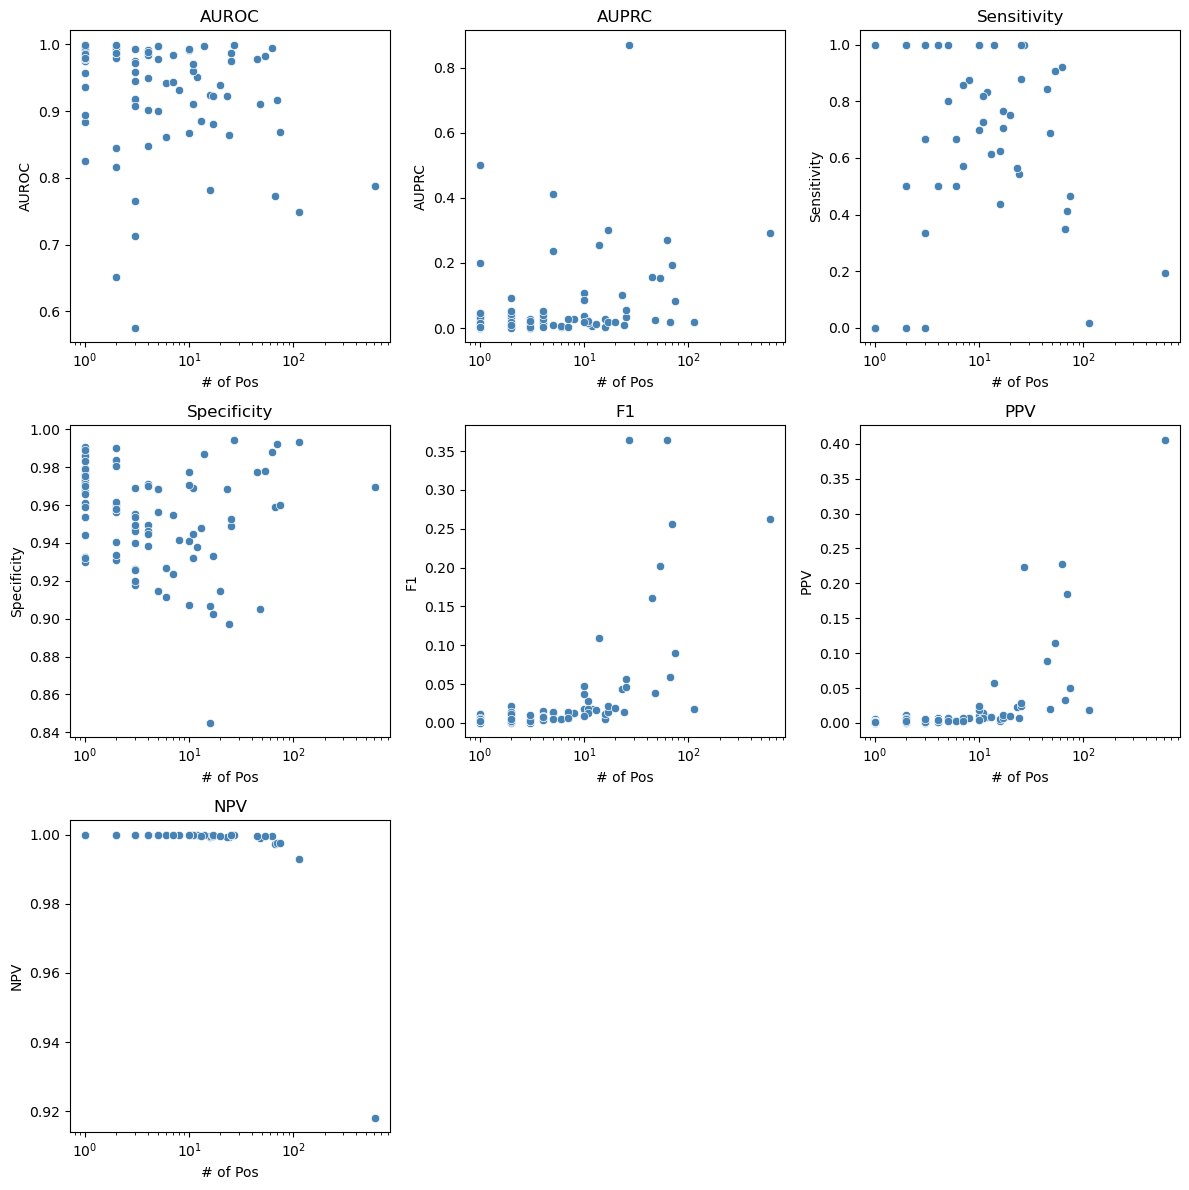

In [37]:
hist_view = view1[view1['# of Pos'] > 0][['AUROC','AUPRC','Sensitivity','Specificity','F1', 'PPV', 'NPV', '# of Pos']]

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

axes = axes.flatten()
columns_to_plot = [col for col in hist_view.columns if col != '# of Pos']

# Iterate through each column and create a scatter plot
for i, column in enumerate(columns_to_plot):
    sns.scatterplot(x='# of Pos', y=column, data=hist_view, ax=axes[i], color="steelblue")
    axes[i].set_xscale('log') 
    axes[i].set_title(column)

# Turn off any unused subplots
for i in range(len(columns_to_plot), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [15]:
new_data_df

,ID,Name,Accuracy,Sensitivity,Specificity,F1,PPV,NPV,FPR,FNR,FDR
44877.0,44877.0,protein-containing complex binding,0.798423,0.562500,0.798561,0.003264,0.001637,0.999678,0.201439,0.437500,0.998363
5102.0,5102.0,signaling receptor binding,0.856666,0.666667,0.856834,0.008118,0.004084,0.999658,0.143166,0.333333,0.995916
31369.0,31369.0,translation initiation factor binding,0.910834,1.000000,0.910828,0.001623,0.000812,1.000000,0.089172,0.000000,0.999188
47724.0,47724.0,inosine nucleosidase activity,0.000000,NaN,0.000000,0.000000,0.000000,NaN,1.000000,NaN,1.000000
4623.0,4623.0,phospholipase A2 activity,0.964546,1.000000,0.964543,0.004073,0.002041,1.000000,0.035457,0.000000,0.997959
...,...,...,...,...,...,...,...,...,...,...,...
3682.0,3682.0,chromatin binding,0.895064,0.850000,0.895097,0.011769,0.005925,0.999877,0.104903,0.150000,0.994075
31625.0,31625.0,ubiquitin protein ligase binding,0.860667,0.700000,0.860726,0.003664,0.001837,0.999872,0.139274,0.300000,0.998163
50840.0,50840.0,extracellular matrix binding,0.920528,1.000000,0.920525,0.000912,0.000456,1.000000,0.079475,0.000000,0.999544
16779.0,16779.0,nucleotidyltransferase activity,0.942671,1.000000,0.942669,0.001263,0.000632,1.000000,0.057331,0.000000,0.999368


In [38]:
file_path = '../kg/random_sigmoid_eval.pkl'

with open(file_path, 'rb') as file:
    data_sig = pickle.load(file)

In [39]:
view1_sig = data_sig[['ID', 'Name', 'AUROC', 'AUPRC', 'Accuracy',
       'Sensitivity', 'Specificity', 'F1', 'PPV', 'NPV', 'FPR', 'FNR', 'FDR',
       '# of Pos', 'Prediction', 'Labels']]
view2_sig = data_sig[['ID', 'Name', 'AUROC', 'AUPRC', 'Accuracy',
       'Recall@5%', 'Recall_Random@5%',
       'AP@5%', 'Hits@5%', 'Missed@5%']]
view3_sig = data_sig[['ID', 'Name', 'AUROC', 'AUPRC', 'Accuracy',
       'Recall@10%', 'Recall_Random@10%',
       'AP@10%', 'Hits@10%', 'Missed@10%']]
view4_sig = data_sig[['ID', 'Name', 'AUROC', 'AUPRC', 'Accuracy',
              'Recall@50', 'Recall_Random@50',
       'AP@50', 'Hits@50', 'Missed@50']]
view5_sig = data_sig[['ID', 'Name', 'AUROC', 'AUPRC', 'Accuracy',
              'Recall@100', 'Recall_Random@100',
       'AP@100', 'Hits@100', 'Missed@100']]

In [44]:
view1_sig[view1_sig['# of Pos']>0]

,ID,Name,AUROC,AUPRC,Accuracy,Sensitivity,Specificity,F1,PPV,NPV,FPR,FNR,FDR,# of Pos,Prediction,Labels
8233.0,8233.0,peptidase activity,0.494112,0.000380,0.998284,0.000000,0.998616,0.000000,0.000000,0.999667,0.001384,1.000000,1.000000,6,"{'1.0': 0.3988393, '10.0': 0.095596455, '100.0...","{'1.0': 0, '10.0': 0, '100.0': 0, '1000.0': 0,..."
3824.0,3824.0,catalytic activity,0.523018,0.000440,0.997958,0.000000,0.998068,0.000000,0.000000,0.999889,0.001932,1.000000,1.000000,2,"{'1.0': 0.36069638, '10.0': 0.08734748, '100.0...","{'1.0': 0, '10.0': 0, '100.0': 0, '1000.0': 0,..."
5515.0,5515.0,protein binding,0.487167,0.097713,0.897091,0.011419,0.992123,0.021053,0.134615,0.903411,0.007877,0.988581,0.865385,613,"{'1.0': 0.39359352, '10.0': 0.12706052, '100.0...","{'1.0': 0, '10.0': -1, '100.0': -1, '1000.0': ..."
8022.0,8022.0,protein C-terminus binding,0.453732,0.000387,0.997885,0.000000,0.998274,0.000000,0.000000,0.999610,0.001726,1.000000,1.000000,7,"{'1.0': 0.4162767, '10.0': 0.08664548, '100.0'...","{'1.0': 0, '10.0': 0, '100.0': 0, '1000.0': 0,..."
19992.0,19992.0,diacylglycerol binding,0.561266,0.000126,0.993879,0.000000,0.993934,0.000000,0.000000,0.999945,0.006066,1.000000,1.000000,1,"{'1.0': 0.55051714, '10.0': 0.064345025, '100....","{'1.0': 0, '10.0': 0, '100.0': 0, '1000.0': 0,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4844.0,4844.0,uracil DNA N-glycosylase activity,0.617725,0.000144,0.998567,0.000000,0.998622,0.000000,0.000000,0.999945,0.001378,1.000000,1.000000,1,"{'1.0': 0.4083129, '10.0': 0.06453313, '100.0'...","{'1.0': 0, '10.0': 0, '100.0': 0, '1000.0': 0,..."
44325.0,44325.0,ion channel binding,0.378712,0.000374,0.998114,0.000000,0.998557,0.000000,0.000000,0.999555,0.001443,1.000000,1.000000,8,"{'1.0': 0.4567066, '10.0': 0.10351199, '100.0'...","{'1.0': 0, '10.0': 0, '100.0': 0, '1000.0': 0,..."
31386.0,31386.0,protein tag,0.614171,0.000143,0.985719,0.000000,0.985773,0.000000,0.000000,0.999944,0.014227,1.000000,1.000000,1,"{'1.0': 0.30887514, '10.0': 0.08952565, '100.0...","{'1.0': 0, '10.0': 0, '100.0': 0, '1000.0': 0,..."
5509.0,5509.0,calcium ion binding,0.588097,0.006026,0.995481,0.028571,0.997421,0.024691,0.021739,0.998050,0.002579,0.971429,0.978261,35,"{'1.0': 0.43670014, '10.0': 0.13898388, '100.0...","{'1.0': 0, '10.0': 0, '100.0': 0, '1000.0': -1..."


In [41]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix
preds = list(data_sig['Prediction'])
labels = list(data_sig['Labels'])


acc, sens, spec, f1 = [], [], [], []
ppv, npv, fpr, fnr, fdr = [], [], [], [], []

for i in range(len(preds)):
    fixed_keys = [key for key,val in labels[i].items() if val != -1]
    pred_array = np.array([preds[i][j] for j in fixed_keys])
    lab_array = np.array([labels[i][j] for j in fixed_keys])

    y_pred_s = [1 if j >= 0.5 else 0 for j in pred_array]
    y = lab_array
    cm1 = confusion_matrix(y, y_pred_s)
    if len(cm1) == 1:
        cm1 = np.array([[cm1[0,0], 0], [0, 0]])
    total1=sum(sum(cm1))
    accuracy1=(cm1[0,0]+cm1[1,1])/total1
    acc.append(accuracy1)

    sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    sens.append(sensitivity1)

    specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    spec.append(specificity1)

    f1.append(f1_score(y, y_pred_s))

    TN = cm1[0][0]
    FN = cm1[1][0]
    TP = cm1[1][1]
    FP = cm1[0][1]

    # Precision or positive predictive value
    ppv.append(TP/(TP+FP))
    # Negative predictive value
    npv.append( TN/(TN+FN))
    # Fall out or false positive rate
    fpr.append(FP/(FP+TN))
    # False negative rate
    fnr.append(FN/(TP+FN))
    # False discovery rate
    fdr.append(FP/(TP+FP))

In [45]:
new_data_sig = {'ID':data_sig['ID'], 'Name':data_sig['Name'], 'Accuracy':acc,
            'Sensitivity':sens, 'Specificity':spec, 'F1':f1,
            'PPV':ppv, 'NPV':npv, 'FPR':fpr, 'FNR':fnr, 'FDR':fdr, '# of Pos':data_sig['# of Pos']}

new_data_sig_df = pd.DataFrame(new_data_sig)

In [46]:
new_data_sig_df[new_data_sig_df['# of Pos']>0]

,ID,Name,Accuracy,Sensitivity,Specificity,F1,PPV,NPV,FPR,FNR,FDR,# of Pos
8233.0,8233.0,peptidase activity,0.843686,0.000000,0.843870,0.000000,0.000000,0.999742,0.156130,1.000000,1.000000,6
3824.0,3824.0,catalytic activity,0.830131,0.000000,0.830191,0.000000,0.000000,0.999913,0.169809,1.000000,1.000000,2
5515.0,5515.0,protein binding,0.583101,0.011419,0.606194,0.002122,0.001170,0.938195,0.393806,0.988581,0.998830,613
8022.0,8022.0,protein C-terminus binding,0.833892,0.000000,0.834105,0.000000,0.000000,0.999694,0.165895,1.000000,1.000000,7
19992.0,19992.0,diacylglycerol binding,0.834692,0.000000,0.834722,0.000000,0.000000,0.999957,0.165278,1.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4844.0,4844.0,uracil DNA N-glycosylase activity,0.841960,0.000000,0.841991,0.000000,0.000000,0.999957,0.158009,1.000000,1.000000,1
44325.0,44325.0,ion channel binding,0.839294,0.000000,0.839539,0.000000,0.000000,0.999653,0.160461,1.000000,1.000000,8
31386.0,31386.0,protein tag,0.814878,0.000000,0.814907,0.000000,0.000000,0.999956,0.185093,1.000000,1.000000,1
5509.0,5509.0,calcium ion binding,0.814794,0.028571,0.815817,0.000401,0.000202,0.998454,0.184183,0.971429,0.999798,35


In [47]:
view1_sig[view1_sig['# of Pos']>0]

,ID,Name,AUROC,AUPRC,Accuracy,Sensitivity,Specificity,F1,PPV,NPV,FPR,FNR,FDR,# of Pos,Prediction,Labels
8233.0,8233.0,peptidase activity,0.494112,0.000380,0.998284,0.000000,0.998616,0.000000,0.000000,0.999667,0.001384,1.000000,1.000000,6,"{'1.0': 0.3988393, '10.0': 0.095596455, '100.0...","{'1.0': 0, '10.0': 0, '100.0': 0, '1000.0': 0,..."
3824.0,3824.0,catalytic activity,0.523018,0.000440,0.997958,0.000000,0.998068,0.000000,0.000000,0.999889,0.001932,1.000000,1.000000,2,"{'1.0': 0.36069638, '10.0': 0.08734748, '100.0...","{'1.0': 0, '10.0': 0, '100.0': 0, '1000.0': 0,..."
5515.0,5515.0,protein binding,0.487167,0.097713,0.897091,0.011419,0.992123,0.021053,0.134615,0.903411,0.007877,0.988581,0.865385,613,"{'1.0': 0.39359352, '10.0': 0.12706052, '100.0...","{'1.0': 0, '10.0': -1, '100.0': -1, '1000.0': ..."
8022.0,8022.0,protein C-terminus binding,0.453732,0.000387,0.997885,0.000000,0.998274,0.000000,0.000000,0.999610,0.001726,1.000000,1.000000,7,"{'1.0': 0.4162767, '10.0': 0.08664548, '100.0'...","{'1.0': 0, '10.0': 0, '100.0': 0, '1000.0': 0,..."
19992.0,19992.0,diacylglycerol binding,0.561266,0.000126,0.993879,0.000000,0.993934,0.000000,0.000000,0.999945,0.006066,1.000000,1.000000,1,"{'1.0': 0.55051714, '10.0': 0.064345025, '100....","{'1.0': 0, '10.0': 0, '100.0': 0, '1000.0': 0,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4844.0,4844.0,uracil DNA N-glycosylase activity,0.617725,0.000144,0.998567,0.000000,0.998622,0.000000,0.000000,0.999945,0.001378,1.000000,1.000000,1,"{'1.0': 0.4083129, '10.0': 0.06453313, '100.0'...","{'1.0': 0, '10.0': 0, '100.0': 0, '1000.0': 0,..."
44325.0,44325.0,ion channel binding,0.378712,0.000374,0.998114,0.000000,0.998557,0.000000,0.000000,0.999555,0.001443,1.000000,1.000000,8,"{'1.0': 0.4567066, '10.0': 0.10351199, '100.0'...","{'1.0': 0, '10.0': 0, '100.0': 0, '1000.0': 0,..."
31386.0,31386.0,protein tag,0.614171,0.000143,0.985719,0.000000,0.985773,0.000000,0.000000,0.999944,0.014227,1.000000,1.000000,1,"{'1.0': 0.30887514, '10.0': 0.08952565, '100.0...","{'1.0': 0, '10.0': 0, '100.0': 0, '1000.0': 0,..."
5509.0,5509.0,calcium ion binding,0.588097,0.006026,0.995481,0.028571,0.997421,0.024691,0.021739,0.998050,0.002579,0.971429,0.978261,35,"{'1.0': 0.43670014, '10.0': 0.13898388, '100.0...","{'1.0': 0, '10.0': 0, '100.0': 0, '1000.0': -1..."
